# GitHub Activity Plot
We look at number of commits (binned by Month), number of contributors and number of line code changes.

## 1. Clone a repository:
```
$ git clone https://github.com/microsoft/AirSim.git
``` 
 
## 2. Get log:
```
$ git log --date=format:%Y%m%d > AirSimGitHubLog20211017.txt 
```
NB Time formatting options: https://www.ibm.com/docs/en/z-workload-scheduler/9.5.0?topic=troubleshooting-date-time-format-reference-strftime
## 3. Get data

In [194]:
#############################################################
# Commit info
# Coding standard: https://www.python.org/dev/peps/pep-0008/
#############################################################
class CommitInfo():
    
    """
    Public member variables
    """
    
    commit1 = ''
    # the following commit listed by "git log" command
    commit2 = ''
    author = ''
    date = ''
    results = []
    # dictionaries of commit counts and unique authors, binned by month 
    commits = {}
    authors = {}
    # arrays to store sorted keys and counts
    keys = []
    ccnt = []
    acnt = []
    # the date range being compared between repos
    range_keys = []
    """
    Public methods
    """
    
    def __init__(self, start_year = 2017, end_year = 2022):
        """
        Class constructor, initialised with the year range for log history analysis
        """
        self.commit1 = ''
        self.commit2 = ''
        self.author = ''
        self.date = ''
        self.results = []
        self.commits = {}
        self.authors = {}
        self.keys = []
        self.ccnt = []
        self.acnt = []
        self.range_keys = []
        self.set_keys(start_year, end_year)

    def set_keys(self, start_year, end_year):
        """
        Set the key range we need to look at
        Input
            start_year: integer
            end_year: integer
        Output
            none
        """
        strkey = ''
        for year in range (start_year, end_year):
            for month in range(1,13):
                strmonth = ''
                if len(str(month)) == 1:
                    strmonth = '0' + str(month)
                else:
                    strmonth = str(month)
                strkey = "{}{}".format(str(year), str(strmonth))
                self.range_keys.append(strkey)    
                
    def process_line(self, line):
        info = line.split()
        # We are expecting lines like:
        # commit c2da7c780fb9a1bcd89001d029dbeb18ba94533f
        # Author: zimmy87 <zimmy87@gmail.com>
        # Date:   20211006
        # First we get the author, when we get the date we have the commit,
        # it can then be stored and both member variables reset
        if len(info) == 0:
            return
        if info[0] == 'commit' and len(info) == 2: # expected format commit 8b17a6434...
            # print(info[1])
            #print(len(info))
            #print(self.commit1)
            self.process_commit(info[1])
        if info[0] == 'Author:':
            self.process_author(info[len(info) - 1])
        if info[0] == 'Date:':
            #print(info[1]) 
            self.process_date(info[1])
            
    def process_commit(self, commit):
        """
        Process commit, store a commit, if two exist, compare and get number of line changes
        NB We put this on hold until 1. git diffs can be accessed though Jupyter Notebook or
        2. data is generated with a shell script, and imported into Jupyter Notebook.
        Input:
            commit: String, commit hash
        Output:
            none
        """
        from os import system
        if self.commit1 == '':
            self.commit1 = commit
        else:
            # print("Processing commit ", self.commit1)
            self.commit2 = commit
            # print(self.commit1)
            self.commit1 = self.commit2
            self.commit2 = ''
            
    def process_author(self, author):
        """
        Store commit author
        Input:
            author: string
        Output:
            none
        """
        self.author = author
        # print(self.author)
        
    def process_date(self, date):
        """
        Store commit date, add entry to dictionary
        Input:
            date: string, expected format YYYYMMDD
        Output:
            none
        """
        if(len(date) < 6): # could be e.g. Wed in a squashed commit, which has already been counted as single commit
            print("Unexpected date format for commit {}, skipping.".format(self.commit1))
            return
        self.date = date[0:6]
        # print(self.date)
        # store
        self.results.append([self.date, self.author, self.commit1])
        # add to dictionaries, increment commit count, add unique author
        key = self.date
        self.commits[key] = self.commits[key] + 1 if key in self.commits else 1
        if key in self.authors:
            self.authors[key].append(self.author)
        else:
            self.authors[key] = [self.author]        
        # clear vars
        self.author = ""
        self.date = ""
    
    def sort_counts(self):
        """
        Sort and store, key, commit and author counts by key
        Input:
            none
        Output:
            none
        """
        
        for key in sorted(self.commits):
            #print(key, self.commits[key], len(set(self.authors[key])))
            self.keys.append(key)
            self.ccnt.append(self.commits[key])
            self.acnt.append(self.authors[key])  
            
    def pad_sort_counts(self):
        """
        Pad, sort and store, key, commit and author counts by key. If no key is found, pad with zero
        Input:
            none
        Output:
            none
        """
        # for key in sorted(self.commits):
        for key in self.range_keys:
            c = 0 # commit count
            a = 0 # author count
            #print(key, self.commits[key], len(set(self.authors[key])))
            if key in self.commits:
                c = self.commits[key]
                a = len(set(self.authors[key]))
            self.keys.append(key)
            self.ccnt.append(c)
            self.acnt.append(a)              
            
    def plot_graph(self, rgb = 'r'):
        """
        Plot the commit history, use rgb provided otherwise default to red
        Input
            rgb: string, rgb colour to be used
        """
        # rgb = 'r'
        # plotting, the data we need:
        import matplotlib.pyplot as plt
        plt.rcParams["figure.figsize"] = (18,4)
        plt.plot(self.ccnt, rgb + '--')
        plt.plot(self.ccnt, rgb + 'o')
        plt.ylabel('Commits')
        plt.show()
        # date ticks - https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
        print("Min date: {}, Max date: {}".format(self.keys[0], self.keys[len(self.keys)-1]))        

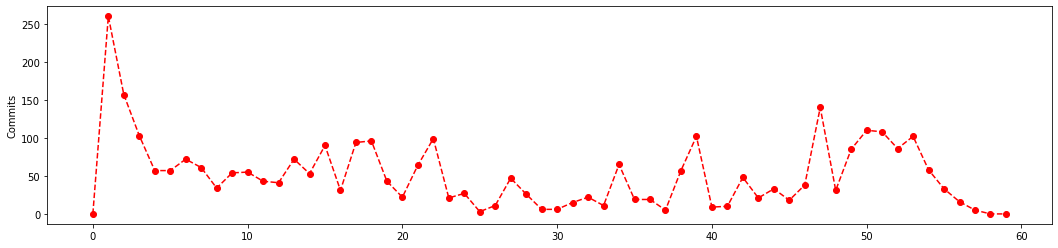

Min date: 201701, Max date: 202112


In [195]:
# AirSim
asim = CommitInfo()
file = open("AirSimGitHubLog20211017.txt", "r")
for line in file:
    asim.process_line(line)
file.close()
asim.pad_sort_counts()
asim.plot_graph()

In [196]:
#for i in range(0, len(asim.range_keys)):
#    print(asim.range_keys[i])
# print(asim.commits)
# print('202501' in asim.commits)
# asim.ccnt
print(asim.range_keys)

['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112']


Unexpected date format for commit 4d428a30df56f0941f3736c937deb7e33991ffbd, skipping.
Unexpected date format for commit 4d428a30df56f0941f3736c937deb7e33991ffbd, skipping.


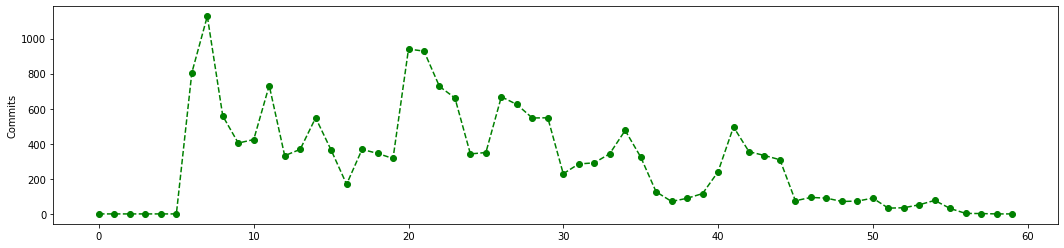

Min date: 201701, Max date: 202112


In [197]:
# Baidu
baidu = CommitInfo()
file = open("BaiduApolloGitHubLog20211024.txt", "r")
for line in file:
    baidu.process_line(line)
file.close()
baidu.pad_sort_counts()
baidu.plot_graph('g')

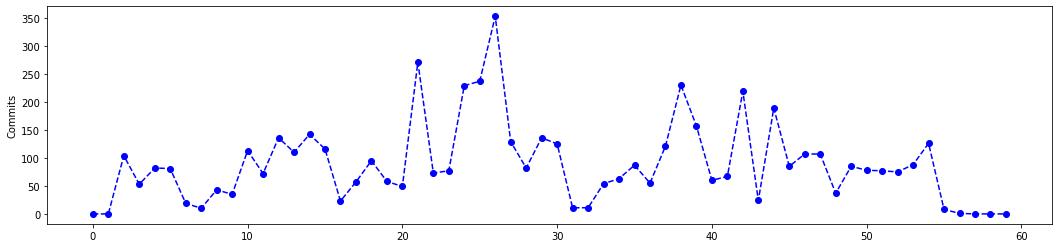

Min date: 201701, Max date: 202112


In [198]:
# Carla
carla = CommitInfo()
file = open("CarlaGitHubLog20211024.txt", "r")
for line in file:
    carla.process_line(line)
file.close()
carla.pad_sort_counts()
carla.plot_graph('b')

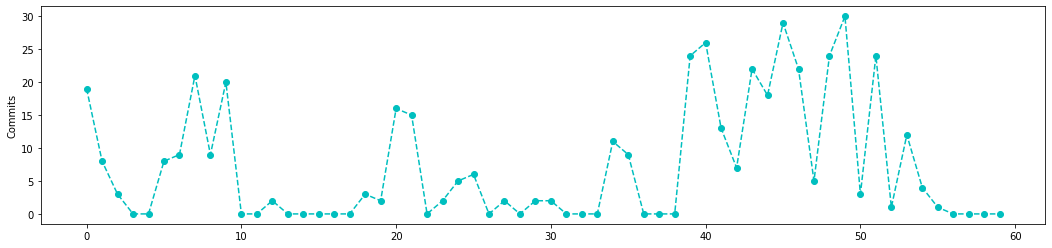

Min date: 201701, Max date: 202112


In [199]:
# SDSandbox
SDSandbox = CommitInfo()
file = open("SDSandboxGitHubLog20211024.txt", "r")
for line in file:
    SDSandbox.process_line(line)
file.close()
SDSandbox.pad_sort_counts()
SDSandbox.plot_graph('c')

Unexpected date format for commit 7777b7229d6de8d41737ebfaa11f5cd47b411ffb, skipping.
Unexpected date format for commit 3ab7b98a9d419a5d6769ee0debf5c9f2551d512f, skipping.
Unexpected date format for commit c1a5a43d660659a81258f374c804b6d84a0be8b0, skipping.
Unexpected date format for commit 403b9259275c7638ab767bde107bcb0205be3532, skipping.
Unexpected date format for commit 2e5c3abdbdb1204a4fec79bac6b50e4dc45983c8, skipping.
Unexpected date format for commit 01b6ef33f3440eb698a42ccd5975ab391783953f, skipping.
Unexpected date format for commit bf3a3dcff20940ab62bd42bef7c88e31dd027578, skipping.


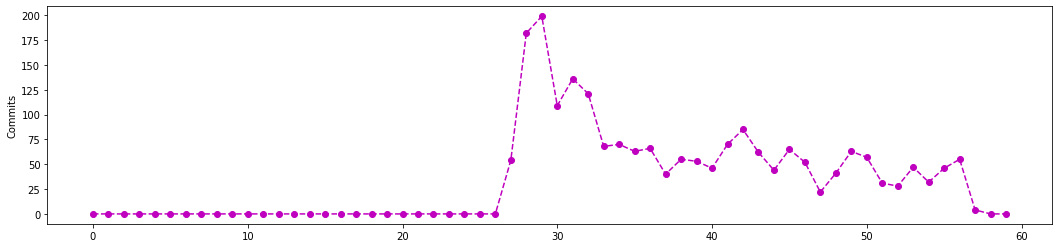

Min date: 201701, Max date: 202112


In [200]:
# LGSVL
LGSVL = CommitInfo()
file = open("LGSVLGitHubLog20211024.txt", "r")
for line in file:
    LGSVL.process_line(line)
file.close()
LGSVL.pad_sort_counts()
LGSVL.plot_graph('m')

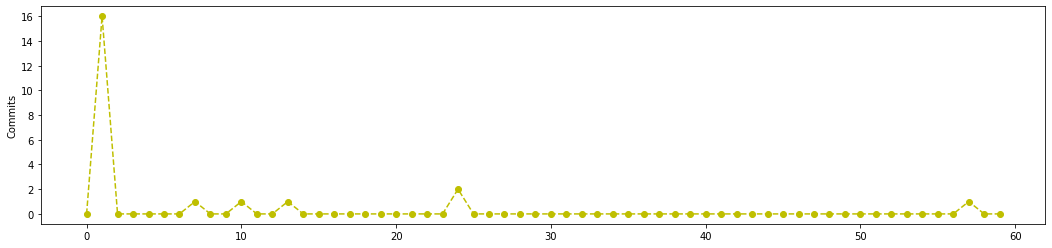

Min date: 201701, Max date: 202112


In [201]:
# Udacity
Udacity = CommitInfo()
file = open("UdacityGitHubLog20211024.txt", "r")
for line in file:
    Udacity.process_line(line)
file.close()
Udacity.pad_sort_counts()
Udacity.plot_graph('y')

In [202]:
mycommits = {}
myauthors = {}
for mylist in ci.results:
    # print("Date: {}, author: {}, commit: {}".format(mylist[0], mylist[1], mylist[2]))
    key = mylist[0]
    mycommits[key] = mycommits[key] + 1 if key in mycommits else 1
    #myauthors[key] = myauthors[key].append(mylist[1]) if key in myauthors else myauthors[key] = [mylist[1]]
    if key in myauthors:
        myauthors[key].append(mylist[1])
    else:
        myauthors[key] = [mylist[1]]
for key in mycommits:
    print("key: {}, commits: {}, authors: {}".format(key, mycommits[key], len(set(myauthors[key]))))

key: 202110, commits: 5, authors: 2
key: 202109, commits: 16, authors: 5
key: 202105, commits: 86, authors: 12
key: 202104, commits: 108, authors: 6
key: 202108, commits: 33, authors: 4
key: 202107, commits: 58, authors: 10
key: 202102, commits: 85, authors: 13
key: 202008, commits: 21, authors: 6
key: 202106, commits: 102, authors: 9
key: 202101, commits: 31, authors: 5
key: 202009, commits: 33, authors: 12
key: 202103, commits: 110, authors: 17
key: 202012, commits: 140, authors: 14
key: 202001, commits: 19, authors: 6
key: 201905, commits: 26, authors: 8
key: 201904, commits: 47, authors: 6
key: 202007, commits: 48, authors: 16
key: 202006, commits: 10, authors: 4
key: 202004, commits: 102, authors: 11
key: 202011, commits: 38, authors: 9
key: 202010, commits: 18, authors: 9
key: 202005, commits: 9, authors: 7
key: 202002, commits: 5, authors: 3
key: 201911, commits: 65, authors: 12
key: 202003, commits: 57, authors: 10
key: 201810, commits: 64, authors: 20
key: 201901, commits: 27,

In [203]:
# unsorted
for key in ci.commits:
    print("key: {}, commits: {}, authors: {}".format(key, ci.commits[key], len(set(ci.authors[key]))))

key: 202110, commits: 5, authors: 2
key: 202109, commits: 16, authors: 5
key: 202105, commits: 86, authors: 12
key: 202104, commits: 108, authors: 6
key: 202108, commits: 33, authors: 4
key: 202107, commits: 58, authors: 10
key: 202102, commits: 85, authors: 13
key: 202008, commits: 21, authors: 6
key: 202106, commits: 102, authors: 9
key: 202101, commits: 31, authors: 5
key: 202009, commits: 33, authors: 12
key: 202103, commits: 110, authors: 17
key: 202012, commits: 140, authors: 14
key: 202001, commits: 19, authors: 6
key: 201905, commits: 26, authors: 8
key: 201904, commits: 47, authors: 6
key: 202007, commits: 48, authors: 16
key: 202006, commits: 10, authors: 4
key: 202004, commits: 102, authors: 11
key: 202011, commits: 38, authors: 9
key: 202010, commits: 18, authors: 9
key: 202005, commits: 9, authors: 7
key: 202002, commits: 5, authors: 3
key: 201911, commits: 65, authors: 12
key: 202003, commits: 57, authors: 10
key: 201810, commits: 64, authors: 20
key: 201901, commits: 27,

In [204]:
        #cnnt = []
        #acnt = []
        
for key in sorted(ci.commits):
    print(key, ci.commits[key], len(set(ci.authors[key])))
    #self.ccnt.append(self.commits[key])
    #self.acnt.append(self.authors[key]) 

201702 260 22
201703 157 14
201704 103 6
201705 57 6
201706 57 8
201707 72 3
201708 61 3
201709 34 4
201710 54 8
201711 55 7
201712 43 8
201801 41 7
201802 72 12
201803 53 11
201804 90 10
201805 31 9
201806 94 12
201807 96 19
201808 43 10
201809 22 9
201810 64 20
201811 99 15
201812 21 8
201901 27 13
201902 3 3
201903 11 5
201904 47 6
201905 26 8
201906 6 5
201907 6 3
201908 15 7
201909 22 6
201910 11 11
201911 65 12
201912 19 8
202001 19 6
202002 5 3
202003 57 10
202004 102 11
202005 9 7
202006 10 4
202007 48 16
202008 21 6
202009 33 12
202010 18 9
202011 38 9
202012 140 14
202101 31 5
202102 85 13
202103 110 17
202104 108 6
202105 86 12
202106 102 9
202107 58 10
202108 33 4
202109 16 5
202110 5 2


In [205]:
def set_zero_to_nan(ccnt):
    """
    Set all zero values in a list, to nans in a numpy array
    Input
        ccnt: list of integers
    Output
        np_arr: numpy array of floats
    """
    import numpy as np
    np_arr = np.array(ccnt, dtype = np.double)
    np_arr[np_arr==0] = np.nan
    return np_arr

# AirSim
as_arr = set_zero_to_nan(asim.ccnt)
# Baidu
bd_arr = set_zero_to_nan(baidu.ccnt)
# Carla
ca_arr = set_zero_to_nan(carla.ccnt)
# LGSVL
lg_arr = set_zero_to_nan(LGSVL.ccnt)
# SDSandbox
sd_arr = set_zero_to_nan(SDSandbox.ccnt)
# Udacity
ud_arr = set_zero_to_nan(Udacity.ccnt)

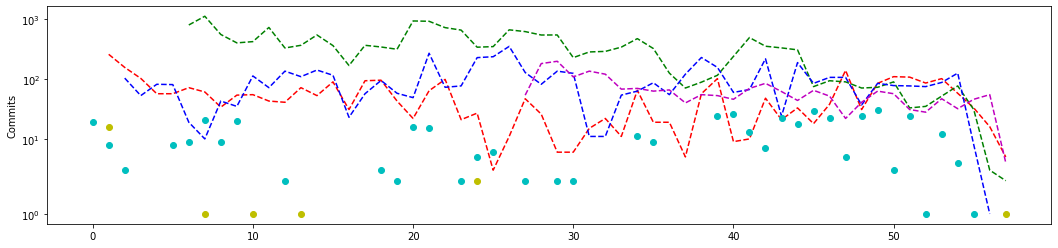

In [206]:
# plotting, the data we need:
import matplotlib.pyplot as plt
# plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.yscale("symlog")
plt.rcParams["figure.figsize"] = (18,4)
# AirSim
# plt.plot(asim.ccnt, 'r--')
# plt.plot(asim.ccnt, 'ro')
plt.plot(as_arr, 'r--')
#plt.plot(as_arr, 'ro')
# Baidu
# plt.plot(baidu.ccnt, 'g--')
# plt.plot(baidu.ccnt, 'go')
plt.plot(bd_arr, 'g--')
#plt.plot(bd_arr, 'go')
# Carla
# plt.plot(carla.ccnt, 'b--')
# plt.plot(carla.ccnt, 'bo')
plt.plot(ca_arr, 'b--')
#plt.plot(ca_arr, 'bo')
# LGSVL
#plt.plot(LGSVL.ccnt, 'm--')
#plt.plot(LGSVL.ccnt, 'mo')
plt.plot(lg_arr, 'm--')
#plt.plot(lg_arr, 'mo')

# SDSandbox
#plt.plot(SDSandbox.ccnt, 'c--')
#plt.plot(SDSandbox.ccnt, 'co')
#plt.plot(sd_arr, 'c--')
plt.plot(sd_arr, 'co')

# Udacity
# plt.plot(Udacity.ccnt, 'y--')
# plt.plot(Udacity.ccnt, 'yo')
plt.plot(ud_arr, 'y--')
plt.plot(ud_arr, 'yo')

plt.ylabel('Commits')
plt.show()
# date ticks - https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html


In [207]:
# AirSim
a_as_arr = set_zero_to_nan(asim.acnt)
# Baidu
a_bd_arr = set_zero_to_nan(baidu.acnt)
# Carla
a_ca_arr = set_zero_to_nan(carla.acnt)
# LGSVL
a_lg_arr = set_zero_to_nan(LGSVL.acnt)
# SDSandbox
a_sd_arr = set_zero_to_nan(SDSandbox.acnt)
# Udacity
a_ud_arr = set_zero_to_nan(Udacity.acnt)

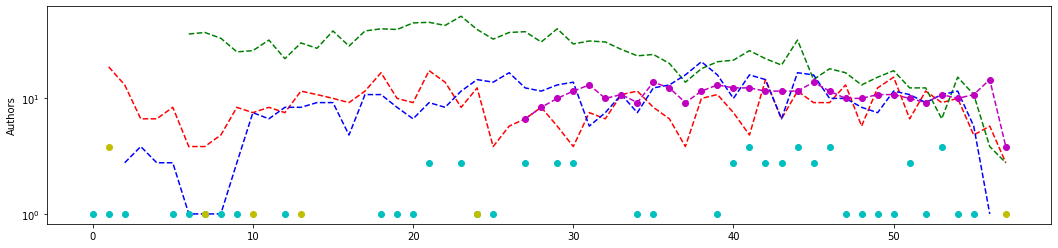

In [212]:
# plotting, the data we need:
import matplotlib.pyplot as plt
# plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.yscale("symlog")
plt.rcParams["figure.figsize"] = (18,4)
# AirSim
# plt.plot(asim.ccnt, 'r--')
# plt.plot(asim.ccnt, 'ro')
plt.plot(a_as_arr, 'r--')
#plt.plot(as_arr, 'ro')
# Baidu
# plt.plot(baidu.ccnt, 'g--')
# plt.plot(baidu.ccnt, 'go')
plt.plot(a_bd_arr, 'g--')
#plt.plot(bd_arr, 'go')
# Carla
# plt.plot(carla.ccnt, 'b--')
# plt.plot(carla.ccnt, 'bo')
plt.plot(a_ca_arr, 'b--')
#plt.plot(ca_arr, 'bo')
# LGSVL
#plt.plot(LGSVL.ccnt, 'm--')
#plt.plot(LGSVL.ccnt, 'mo')
plt.plot(a_lg_arr, 'm--')
plt.plot(a_lg_arr, 'mo')

# SDSandbox
#plt.plot(SDSandbox.ccnt, 'c--')
#plt.plot(SDSandbox.ccnt, 'co')
#plt.plot(sd_arr, 'c--')
plt.plot(a_sd_arr, 'co')

# Udacity
# plt.plot(Udacity.ccnt, 'y--')
# plt.plot(Udacity.ccnt, 'yo')
plt.plot(a_ud_arr, 'y--')
plt.plot(a_ud_arr, 'yo')

plt.ylabel('Authors')
plt.show()

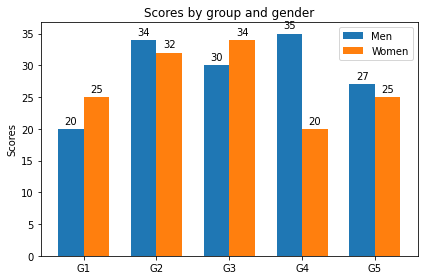

In [3]:
# TODO
# Sort out xticks
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
# Sort out histograms
# Maybe try this
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
# AttributeError: 'AxesSubplot' object has no attribute 'bar_label'
# !pip install matplotlib -U

In [1]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__)) # matplotlib: 3.3.4


matplotlib: 3.4.3


In [216]:
!pip install --upgrade pip

     |████████████████████████████████| 1.7MB 989kB/s eta 0:00:01


In [219]:
!pip install matplotlib -U

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.3 MB 1.6 MB/s            
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
